In [42]:
import requests
from striprtf.striprtf import rtf_to_text

def download_rtf_text(url: str) -> str:
    response = requests.get(url)
    response.raise_for_status()

    rtf_content = response.content.decode("utf-8", errors="ignore")

    text = rtf_to_text(rtf_content)
    return text


url = "http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf"
tt = download_rtf_text(url)

In [43]:
print(tt)


   КИЇВСЬКИЙ ОКРУЖНИЙ АДМІНІСТРАТИВНИЙ СУД |
У Х В А Л А
про залишення позовної заяви без руху
04 грудня 2024 року                           м. Київ                                     № 320/57291/24
Суддя Київського окружного адміністративного суду Жук Р.В., дослідивши матеріали адміністративного позову та додані до нього документи
за позовом   Товариства з обмеженою відповідальністю "Мегого"
до                  Комісії з регулювання азартних ігор та лотерей
третя особа Товариство з обмеженою відповідальністю "ГГБЕТ" 
про               визнання протиправним та скасування рішення від 22.08.2024 №409, -
ВСТАНОВИВ:
До Київського окружного адміністративного суду звернулось Товариство з обмеженою відповідальністю "Мегого" з адміністративним позовом до Комісії з регулювання азартних ігор та лотерей, третя особа - Товариство з обмеженою відповідальністю "ГГБЕТ", про визнання протиправним та скасування рішення від 22.08.2024 №409.
Відповідно до частини 1 статті 171 Кодексу адміністративного 

In [1]:
from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [8]:
url = "http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf"

loader = WebBaseLoader(url)

In [9]:
docs = loader.load(
    
)

In [12]:
print(docs[0].page_content[:100])

{\rtf1\ansi\ansicpg1251\deff0\deflang1049{\fonttbl{\f0\fnil\fcharset204{\*\fname Times New Roman;}Ti


In [17]:
%pip install langgraph langchain_openai

     ---------------------------------------- 0.0/44.7 kB ? eta -:--:--
     ---------------------------------------- 44.7/44.7 kB 2.2 MB/s eta 0:00:00
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   ------------------------------------- -- 143.4/153.3 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 153.3/153.3 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/447.5 kB ? eta -:--:--
   ---------------------- ----------------- 256.0/447.5 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
from dotenv import load_dotenv

from typing import TypedDict, List, Dict, Any, Optional
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
import requests
from striprtf.striprtf import rtf_to_text

load_dotenv()
# Set your OpenAI API key here
api_key = os.getenv("OPENAI_API_KEY")

# Initialize our LLM
model = ChatOpenAI(model="gpt-4o", temperature=0)


In [5]:
class AgentState(TypedDict):

    url: Optional[str]  # Contains the URL to fetch the RTF document
    text: Optional[str]  # Extracted text from the RTF document
    summary: Optional[str]  # Summary of the text

In [ ]:
# url = "http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf"
# text = download_rtf_text(url)

In [6]:
url = "http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf"

In [3]:
def extract_rtf_text(url: str) -> str:
    """
    Extract text from URL in RTF format.

    Args:
        url (str): The URL of the RTF document.

    Returns:
        str: The extracted plain text from the RTF document.
    """
    response = requests.get(url)
    response.raise_for_status()

    rtf_content = response.content.decode("utf-8", errors="ignore")

    text = rtf_to_text(rtf_content)
    return text

def divide(a: int, b: int) -> float:
    """Divide a and b."""
    return a / b


def summarize_text(text: str) -> str:
    """
    Summarizes the given text using the LLM.
    
    Args:
        text (str): The text to summarize.

    Returns:
        str: The summary of the text.
    """
    prompt = f"Summarize the following text:\n\n{text}"
    response = model.invoke([HumanMessage(content=prompt)])
    return response.content

tools = [
    extract_rtf_text,
    divide, 
    summarize_text
]

llm_with_tools = model.bind_tools(tools, parallel_tool_calls=False)

In [ ]:
# summarize_text(text: str) -> str:
#     Summarizes the provided text.

#     Args:
#         text (str): The text to be summarized.

#     Returns:
#         str: The summarized text.


#     Returns:
#         str: The extracted plain text from the RTF document.

# # extract_rtf_text(url: str) -> str:
# #     Extracts and returns the plain text from a given RTF document URL.

# #     Args:
# #         url (str): The URL of the RTF document.

In [11]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.utils.function_calling import convert_to_openai_tool

def assistant(state: AgentState):
    textual_description_of_tool = """
extract_rtf_text(url: str) -> str:
    Extract text from URL in RTF format.
    
    Args:
        url (str): The URL of the RTF document.

    Returns:
        str: The extracted plain text from the RTF document.

summarize_text(text: str) -> str:
    Summarizes the provided text.

    Args:
        text (str): The text to be summarized.

    Returns:
        str: The summarized text.

divide(a: int, b: int) -> float:
    Divide a and b
"""
    # url = state["url"]

    sys_msg = SystemMessage(content=f"You are an helpful agent that can summarize some textes, extract text from url and run some computatio without provided tool\n{textual_description_of_tool} \n  You have access to some otpional url and you can extract text from it. Currently the loaded url is : {url}")

    return {"messages": [llm_with_tools.invoke([sys_msg])], "url": state["url"]}

In [4]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image, display

builder = StateGraph(AgentState)

builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "assistant")

builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)

builder.add_edge("tools", "assistant")
react_graph = builder.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

NameError: name 'AgentState' is not defined

In [15]:
messages = [HumanMessage(content="Divide 6790 by 5")]

messages = react_graph.invoke({"messages": messages, "url": None})

ValueError: No message found in input

In [68]:
messages

{'input_text': None}

In [38]:
messages = [HumanMessage(content=f"Please extract text from this url {url}")]

messages = react_graph.invoke({"messages": messages}, {"input_file": url})

KeyError: 'url'

### Result Agent

In [ ]:
## example


  Using cached langgraph-0.6.8-py3-none-any.whl.metadata (6.8 kB)
  Using cached langgraph_checkpoint-2.1.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached langgraph_prebuilt-0.6.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
Using cached langgraph_prebuilt-0.6.4-py3-none-any.whl (28 kB)
Using cached tenacity-9.1.2-py3-none-any.whl (28 kB)
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)


In [6]:
from typing import TypedDict, List  
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    url: str
    text:str
    summary : str
    classification: str
    entities: List[str]

In [8]:
from langchain_core.prompts import PromptTemplate

def extract_rtf_text(url: str) -> str:
    """
    Extract text from URL in RTF format.

    Args:
        url (str): The URL of the RTF document.

    Returns:
        str: The extracted plain text from the RTF document.
    """
    response = requests.get(url)
    response.raise_for_status()

    rtf_content = response.content.decode("utf-8", errors="ignore")

    text = rtf_to_text(rtf_content)
    return text

def summarize_text(text: str) -> str:
    """
    Summarizes the given text using the LLM.
    
    Args:
        text (str): The text to summarize.
        
    Returns:
        str: The summary of the text.
    """

    summarization_prompt = PromptTemplate.from_template(
        """Summarize the following text in one short sentence. Summarize to ukrainian.
        
        Text: {text}
        
        Summary:"""
    )

    chain = summarization_prompt | model

    response = chain.invoke({"text": text})

    return {"summary": response.content}

# Позивач (ТОВ "Мегого").
# Відповідач (Комісія з регулювання азартних ігор та лотерей).
# Треті особи (ТОВ "ГГБЕТ").
# Суть вимоги (визнати протиправним та скасувати рішення).
# Рішення суду



In [9]:
from pydantic import BaseModel, Field
from typing import Dict, Any

from typing_extensions import Annotated, TypedDict

class Enteties(TypedDict):
    plaintiff: str = Field(..., description="The plaintiff in the case")
    defendant: str = Field(..., description="The defendant in the case")
    claim_essence: str = Field(..., description="The essence of the claim")


def extract_additional_entities(text: str) -> Dict[str, Any]:
    """
    Extracts additional entities from the text
    Args:
        text (str): The text to extract entities from text  Organized by category (plaintiff, respondent, claim essence)
    
    Returns:
        Dict[str, Any]: A dictionary containing the extracted entities

    """
    # Function to identify and extract named entities from text
    # Organized by category (plaintiff, respondent, claim essence)
  
    # Create template for entity extraction prompt
    # Specifies what entities to look for and format (comma-separated
    prompt = PromptTemplate(
      input_variables=["text"],
      template="""Extract all the entities (plaintiff, defendant, claim essence) from the following text.\n\nText: {text}\n\nEntities:"""
  )
    model_llm = model.with_structured_output(Enteties)
    message = HumanMessage(content=prompt.format(text=text))

    entities = model_llm.invoke([message])

    return {"entities": entities}

In [10]:
def case_classification(text: str) -> str:

   """
   Classifies the court decision into one of the categories: plaintiff, defendant, other.

   Args:
       text (str): The text of the court decision.

   Returns:
         str: The classification category.
"""

   
   prompt = PromptTemplate(
       input_variables=["text"],
       template="""Classify the following court decision into one of the categories: plaintiff - the court ruled in favor of the plaintiff, defendant - the court ruled in favor of the defendant, other - the decision is procedural or does not resolve the dispute\n\nText: {text}\n\nCategory:
       Please return only one word cateory without explanation"""
      )
    
   message = HumanMessage(content=prompt.format(text=text))
   classification = model.invoke([message]).content

   return {"classification": classification}

In [10]:
def assistant(state: AgentState):
    textual_description_of_tool = """
    You are a helpful assistant that can perform the following tasks:
    1. Classify the following court decision into one of the categories
    2. Extract named entities (Person, Organization, Location) from text
    3. Summarize text in one sentence
    4. Extract text from URL in RTF format. 
    """

    sys_msg = SystemMessage(content=f"You are an helpful agent that can summarize some textes, extract text from url and run some computatio without provided tool\n{textual_description_of_tool} \n")

    return {"messages": [llm_with_tools.invoke([sys_msg])], "text": state["text"]}

In [11]:
from langchain_openai import ChatOpenAI

tools = [
    extract_rtf_text,
    summarize_text,
    extract_additional_entities,
    case_classification
]

model = ChatOpenAI(model="gpt-4o", temperature=0)

llm_with_tools = model.bind_tools(tools, parallel_tool_calls=False)

In [12]:
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(AgentState)

builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message requires a tool, route to tools
    # Otherwise, provide a direct response
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

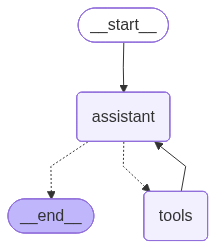

In [13]:
from IPython.display import Image, display

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [14]:
url = "http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf"

In [15]:
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage

messages = [HumanMessage(content="Please Extract text from URL in RTF format. http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf")]
messages = react_graph.invoke({"text": messages})

In [16]:
messages

{'text': [HumanMessage(content='Please Extract text from URL in RTF format. http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf', additional_kwargs={}, response_metadata={})]}

In [6]:
workflow = StateGraph(AgentState)
workflow.add_node("extract_rtf_text", extract_rtf_text)
workflow.add_node("summarize_text", summarize_text)
workflow.add_node("entity_extraction_node", extract_additional_entities)
workflow.add_node("case_classification", case_classification)

workflow.set_entry_point("extract_rtf_text") # Set the entry point of the graph
workflow.add_edge("extract_rtf_text", "summarize_text")
workflow.add_edge("summarize_text", "entity_extraction_node")
workflow.add_edge("entity_extraction_node", "case_classification")
workflow.add_edge("case_classification", END)

app = workflow.compile()

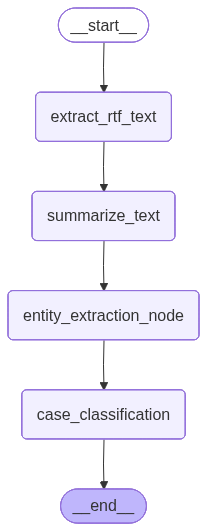

In [7]:
from IPython.display import Image, display

display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [8]:
url = "http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf"
state_input = {"url": url}
result = app.invoke(state_input)

In [29]:
result

{'url': 'http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf',
 'text': '\n\xa0\xa0 КИЇВСЬКИЙ ОКРУЖНИЙ АДМІНІСТРАТИВНИЙ СУД |\nУ Х В А Л А\nпро залишення позовної заяви без руху\n04 грудня 2024 року \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0м. Київ \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0№ 320/57291/24\nСуддя Київського окружного адміністративного суду Жук Р.В., дослідивши матеріали адміністративного позову та додані до нього документи\nза позовом \xa0\xa0Товариства з обмеженою відповідальністю "Мегого"\nдо \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Комісії з регулювання азартних ігор та лотерей\nтретя особа Товариство з обмеженою відповідальністю "ГГБЕТ" \nпро \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0визнання протиправним та скасування рішення від 22.08.2024

In [ ]:
# Позивач (ТОВ "Мегого").
# Відповідач (Комісія з регулювання азартних ігор та лотерей).
# Треті особи (ТОВ "ГГБЕТ").
# Суть вимоги (визнати протиправним та скасувати рішення).
# Рішення суду

In [1]:
# Importing necessary types from the typing module
from typing import TypedDict, List  

# Define a TypedDict named 'State' to represent a structured dictionary
class State(TypedDict):

    text: str  # Stores the original input text
    classification: str  # Represents the classification result (e.g., category label)
    entities: List[str]  # Holds a list of extracted entities (e.g., named entities)
    summary: str  # Stores a summarized version of the text

In [2]:
from langchain_core.prompts import PromptTemplate

def classification_node(text: str) -> dict:
   """
   Classify the text into one of predefined categories.
   
   Parameters:
       state (State): The current state dictionary containing the text to classify
       
   Returns:
       dict: A dictionary with the "classification" key containing the category result
       
   Categories:
       - News: Factual reporting of current events
       - Blog: Personal or informal web writing
       - Research: Academic or scientific content
       - Other: Content that doesn't fit the above categories
   """

   # Define a prompt template that asks the model to classify the given text
   prompt = PromptTemplate(
       input_variables=["text"],
       template="Classify the following text into one of the categories: News, Blog, Research, or Other.\n\nText: {text}\n\nCategory:"
   )

   # Format the prompt with the input text from the state
   message = HumanMessage(content=prompt.format(text=state["text"]))

   # Invoke the language model to classify the text based on the prompt
   classification = model.invoke([message]).content.strip()

   # Return the classification result in a dictionary
   return {"classification": classification}

In [3]:
def entity_extraction_node(text: str) -> dict:
  # Function to identify and extract named entities from text
  # Organized by category (Person, Organization, Location)
  
  # Create template for entity extraction prompt
  # Specifies what entities to look for and format (comma-separated)
  prompt = PromptTemplate(
      input_variables=["text"],
      template="Extract all the entities (Person, Organization, Location) from the following text. Provide the result as a comma-separated list.\n\nText: {text}\n\nEntities:"
  )
  
  # Format the prompt with text from state and wrap in HumanMessage
  message = HumanMessage(content=prompt.format(text=state["text"]))
  
  # Send to language model, get response, clean whitespace, split into list
  entities = model.invoke([message]).content.strip().split(", ")
  
  # Return dictionary with entities list to be merged into agent state
  return {"entities": entities}

In [4]:
def summarize_node(text: str) -> dict:
    # Create a template for the summarization prompt
    # This tells the model to summarize the input text in one sentence
    summarization_prompt = PromptTemplate.from_template(
        """Summarize the following text in one short sentence.
        
        Text: {text}
        
        Summary:"""
    )
    
    # Create a chain by connecting the prompt template to the language model
    # The "|" operator pipes the output of the prompt into the model
    chain = summarization_prompt | model
    
    # Execute the chain with the input text from the state dictionary
    # This passes the text to be summarized to the model
    response = chain.invoke({"text": state["text"]})
    
    # Return a dictionary with the summary extracted from the model's response
    # This will be merged into the agent's state
    return {"summary": response.content}

In [5]:
tools = [
    classification_node,
    entity_extraction_node, 
    summarize_node
]

llm_with_tools = model.bind_tools(tools, parallel_tool_calls=False)

NameError: name 'model' is not defined

In [8]:
def assistant(state: State):
    textual_description_of_tool = """
    You are a helpful assistant that can perform the following tasks:
    1. Classify text into categories (News, Blog, Research, Other)
    2. Extract named entities (Person, Organization, Location) from text
    3. Summarize text in one sentence
    """

    sys_msg = SystemMessage(content=f"You are an helpful agent that can summarize some textes, extract text from url and run some computatio without provided tool\n{textual_description_of_tool} \n  You have access to some otpional url and you can extract text from it.")

    return {"messages": [llm_with_tools.invoke([sys_msg])], "text": state["text"]}

In [10]:
from langgraph.prebuilt import ToolNode, tools_condition

workflow = StateGraph(State)


workflow.add_node("assistant", assistant)
workflow.add_node("tools", ToolNode(tools))

workflow.add_edge(START, "assistant")

workflow.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)

workflow.add_edge("tools", "assistant")
# Compile the graph
app = workflow.compile()

ValueError: Function must have a docstring if description not provided.

In [8]:
workflow = StateGraph(State)

# Add nodes to the graph
workflow.add_node("classification_node", classification_node)
workflow.add_node("entity_extraction", entity_extraction_node)
workflow.add_node("summarization", summarize_node)

# Add edges to the graph
workflow.set_entry_point("classification_node") # Set the entry point of the graph
workflow.add_edge("classification_node", "entity_extraction")
workflow.add_edge("entity_extraction", "summarization")
workflow.add_edge("summarization", END)

# Compile the graph
app = workflow.compile()

In [9]:
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

NameError: name 'Image' is not defined

In [28]:
sample_text = """
Anthropic's MCP (Model Context Protocol) is an open-source powerhouse that lets your applications interact effortlessly with APIs across various systems.
"""

In [29]:
state_input = {"text": sample_text}

In [30]:
state_input

{'text': "\nAnthropic's MCP (Model Context Protocol) is an open-source powerhouse that lets your applications interact effortlessly with APIs across various systems.\n"}

In [31]:
result = app.invoke(state_input)

In [32]:
print("Classification:", result["classification"])


Classification: Other


In [33]:
print("\nEntities:", result["entities"])


Entities: ['Anthropic']


In [34]:
print("\nSummary:", result["summary"])


Summary: Anthropic's MCP enables seamless interaction with APIs across different systems through its open-source platform.


In [74]:
from pydantic import BaseModel, Field

from typing_extensions import Annotated, TypedDict

class Enteties(TypedDict):
    plaintiff: str = Field(..., description="The plaintiff in the case")
    respondent: str = Field(..., description="The respondent in the case")
    claim_essence: str = Field(..., description="The essence of the claim")

In [75]:
prompt = PromptTemplate(
      input_variables=["text"],
      template="""Extract all the entities (plaintiff, respondent, claim essence) from the following text. \n\nText: {text}\n\nEntities:"""
  )
message = HumanMessage(content=prompt.format(text=result["text"]))

In [76]:
model_llm = model.with_structured_output(Enteties)

In [77]:
entities = model_llm.invoke([message])

In [78]:
entities

{'plaintiff': 'Товариство з обмеженою відповідальністю "Мегого"',
 'respondent': 'Комісія з регулювання азартних ігор та лотерей',
 'claim_essence': 'визнання протиправним та скасування рішення від 22.08.2024 №409'}

In [18]:
print(result["text"])


   КИЇВСЬКИЙ ОКРУЖНИЙ АДМІНІСТРАТИВНИЙ СУД |
У Х В А Л А
про залишення позовної заяви без руху
04 грудня 2024 року                           м. Київ                                     № 320/57291/24
Суддя Київського окружного адміністративного суду Жук Р.В., дослідивши матеріали адміністративного позову та додані до нього документи
за позовом   Товариства з обмеженою відповідальністю "Мегого"
до                  Комісії з регулювання азартних ігор та лотерей
третя особа Товариство з обмеженою відповідальністю "ГГБЕТ" 
про               визнання протиправним та скасування рішення від 22.08.2024 №409, -
ВСТАНОВИВ:
До Київського окружного адміністративного суду звернулось Товариство з обмеженою відповідальністю "Мегого" з адміністративним позовом до Комісії з регулювання азартних ігор та лотерей, третя особа - Товариство з обмеженою відповідальністю "ГГБЕТ", про визнання протиправним та скасування рішення від 22.08.2024 №409.
Відповідно до частини 1 статті 171 Кодексу адміністративного 

In [1]:
import base64
import requests
from typing import List, TypedDict, Annotated, Optional
from striprtf.striprtf import rtf_to_text
from langchain_openai import ChatOpenAI
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage
from langgraph.graph.message import add_messages
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image, display

In [2]:
class AgentState(TypedDict):
    # The document provided
    input_file: Optional[str]  # Contains file path (PDF/PNG)
    messages: Annotated[list[AnyMessage], add_messages]

In [3]:
vision_llm = ChatOpenAI(model="gpt-4o")

def extract_text(img_path: str) -> str:
    """
    Extract text from an image file using a multimodal model.
    
    Master Wayne often leaves notes with his training regimen or meal plans.
    This allows me to properly analyze the contents.
    """
    all_text = ""
    try:
        # Read image and encode as base64
        with open(img_path, "rb") as image_file:
            image_bytes = image_file.read()

        image_base64 = base64.b64encode(image_bytes).decode("utf-8")

        # Prepare the prompt including the base64 image data
        message = [
            HumanMessage(
                content=[
                    {
                        "type": "text",
                        "text": (
                            "Extract all the text from this image. "
                            "Return only the extracted text, no explanations."
                        ),
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/png;base64,{image_base64}"
                        },
                    },
                ]
            )
        ]

        # Call the vision-capable model
        response = vision_llm.invoke(message)

        # Append extracted text
        all_text += response.content + "\n\n"

        return all_text.strip()
    except Exception as e:
        # A butler should handle errors gracefully
        error_msg = f"Error extracting text: {str(e)}"
        print(error_msg)
        return ""

def divide(a: int, b: int) -> float:
    """Divide a and b - for Master Wayne's occasional calculations."""
    return a / b




def extract_rtf_text(url: str) -> str:
    """
    Extract text from URL in RTF format.
    """
    response = requests.get(url)
    response.raise_for_status()

    rtf_content = response.content.decode("utf-8", errors="ignore")

    text = rtf_to_text(rtf_content)
    return text



def summarize_text(text: str) -> str:
    """
    Summarizes the given text using the LLM.
    
    Args:
        text (str): The text to summarize.
        
    Returns:
        str: The summary of the text.
    """

    summarization_prompt = PromptTemplate.from_template(
        """Summarize the following text in one short sentence. Summarize to ukrainian.
        
        Text: {text}
        
        Summary:"""
    )

    chain = summarization_prompt | model

    response = chain.invoke({"text": text})

    return {"summary": response.content}

# Equip the butler with tools
tools = [
    divide,
    extract_text,
    extract_rtf_text,
    summarize_text
]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

In [4]:
def assistant(state: AgentState):
    # System message
    textual_description_of_tool="""
extract_text(img_path: str) -> str:
    Extract text from an image file using a multimodal model.

    Args:
        img_path: A local image file path (strings).

    Returns:
        A single string containing the concatenated text extracted from each image.
divide(a: int, b: int) -> float:
    Divide a and b

    Extract text from URL in RTF format.

    Args:
        url (str): The URL of the RTF document.

    Returns:
        str: The extracted plain text from the RTF document.

    Summarizes the given text using the LLM.
    
    Args:
        text (str): The text to summarize.
        
    Returns:
        str: The summary of the text.
"""
    image=state["input_file"]
    sys_msg = SystemMessage(content=f"You are a helpful butler named Alfred that serves Mr. Wayne and Batman. You can analyse documents and run computations with provided tools:\n{textual_description_of_tool} \n You have access to some optional images. Currently the loaded image is: {image}")

    return {
        "messages": [llm_with_tools.invoke([sys_msg] + state["messages"])],
        "input_file": state["input_file"]
    }

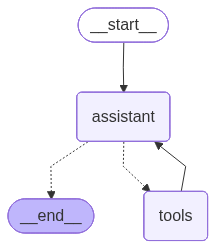

In [5]:
# The graph
builder = StateGraph(AgentState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message requires a tool, route to tools
    # Otherwise, provide a direct response
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show the butler's thought process
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [6]:
messages = [HumanMessage(content="Please Extract text from URL in RTF format. http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf")]
messages = react_graph.invoke({"messages": messages, "input_file": None})

In [7]:
# messages = [HumanMessage(content=f"Please summarize the text {tt}")]
# messages = react_graph.invoke({"messages": messages, "input_file": None})
messages

{'input_file': None,
 'messages': [HumanMessage(content='Please Extract text from URL in RTF format. http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf', additional_kwargs={}, response_metadata={}, id='3a987f1b-7be0-4965-81ee-a2e1369c17a2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_BdgEQv6jn5alqb2HDDpSCDMH', 'function': {'arguments': '{"url":"http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf"}', 'name': 'extract_rtf_text'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 400, 'total_tokens': 452, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CNh5TjkRflqeLcDIxDmN0dSixPysl', 'service_tier': 'd

In [6]:
url = "http://od.reyestr.court.gov.ua/files/61/520ce2d5f53b2a22eafd30fca9c17d43.rtf"
tt = extract_rtf_text(url)

In [7]:
tt

'\n\xa0\xa0 КИЇВСЬКИЙ ОКРУЖНИЙ АДМІНІСТРАТИВНИЙ СУД |\nУ Х В А Л А\nпро залишення позовної заяви без руху\n04 грудня 2024 року \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0м. Київ \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0№ 320/57291/24\nСуддя Київського окружного адміністративного суду Жук Р.В., дослідивши матеріали адміністративного позову та додані до нього документи\nза позовом \xa0\xa0Товариства з обмеженою відповідальністю "Мегого"\nдо \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Комісії з регулювання азартних ігор та лотерей\nтретя особа Товариство з обмеженою відповідальністю "ГГБЕТ" \nпро \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0визнання протиправним та скасування рішення від 22.08.2024 №409, -\nВСТАНОВИВ:\nДо Київського окружного адміністративного суду звернулось Товариство з обме